In [84]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math

In [85]:
titanic = pd.read_excel("titanic.xls")
df = titanic
titanic
#passengerID
# Survived - did the passenger survived
# Pclass - passenger class
# Name (Master is boy, too young to be called Mister)
# Sex
# Age
# Sibsp - number of siblings and/or spouse on board
# Parch - number of parents/children on board
# Fare - ticket fare
# Cabin - room number
# Embarked - the port the passenger embarked from

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [86]:
def round_to_nearest_ten(x):
    if x==0: return 10
    return math.ceil(x/10.0)*10

def round_to_nearest(x):
    return lambda y:  y if x==0 else math.ceil(y/float(x))*x

# Initial Data


Text(0.5, 1.0, 'Number of females and males on board')

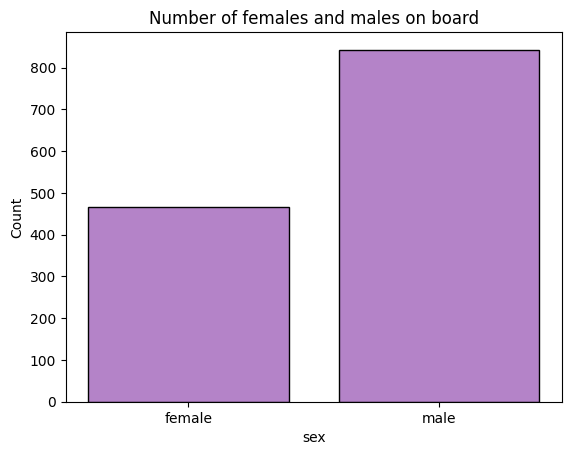

In [87]:
axes = sns.histplot(x="sex",data=df, shrink=.8)
axes.set_title("Number of females and males on board")


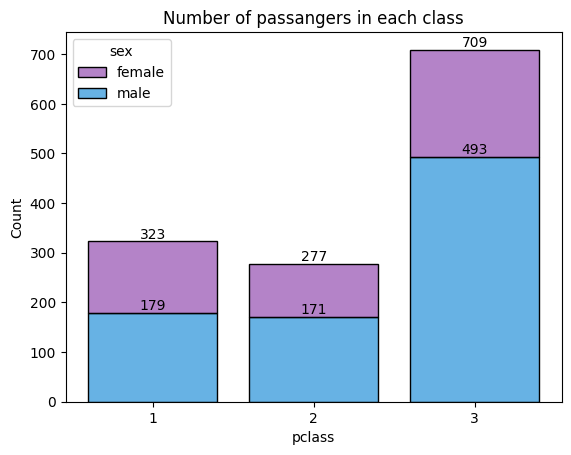

In [88]:
axes = sns.histplot(x=df["pclass"].apply(str),data=df, hue="sex", multiple="stack", shrink=.8)
axes.set_title("Number of passangers in each class")
for i in axes.containers:
    axes.bar_label(i,)

Text(0.5, 1.0, 'Fare payed for each class')

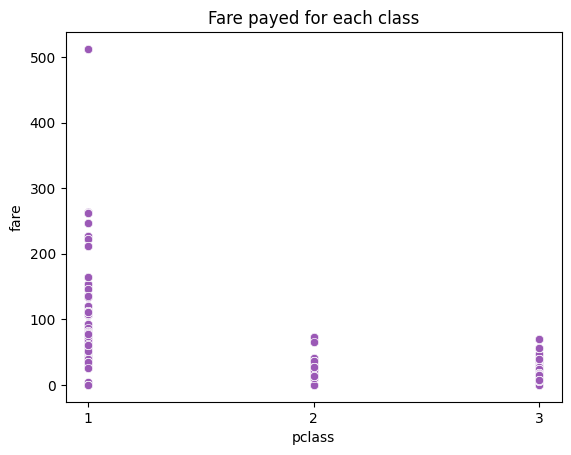

In [89]:
axes = sns.scatterplot(x=df["pclass"].apply(str),data=df, y="fare")
axes.set_title("Fare payed for each class")
# axes.bar_label(axes.containers[0])

Generally higher prices for first class, not necesserally for the other classes

### 1. How is age distributed in every pclass and in every age?

Text(0.5, 1.0, 'Age Distribution For Every Passanger Class')

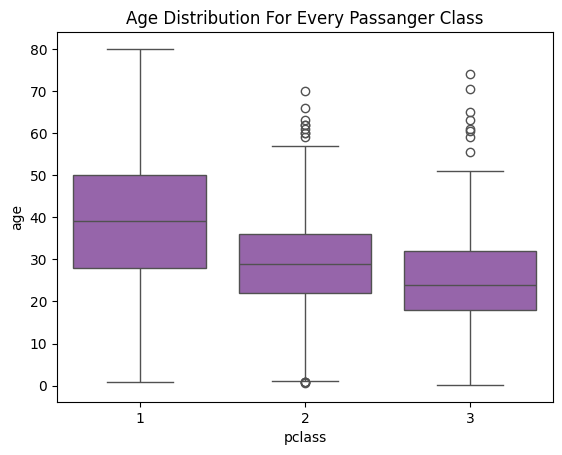

In [90]:
sns.boxplot(x="pclass",y="age",data=df).set_title("Age Distribution For Every Passanger Class")

##### Generally younger people in lower classes

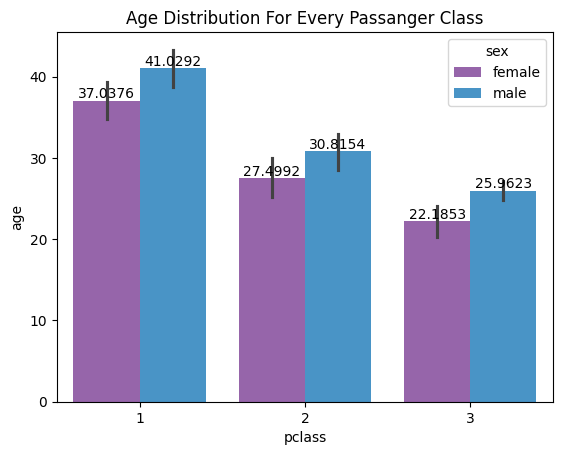

In [91]:
ax = sns.barplot(x="pclass",y="age", hue="sex",data=df)
ax.set_title("Age Distribution For Every Passanger Class")
for i in ax.containers:
    ax.bar_label(i,)


Here we can see number of people and specifically how many males and females are in each class

Text(0, 0.5, 'Number of people')

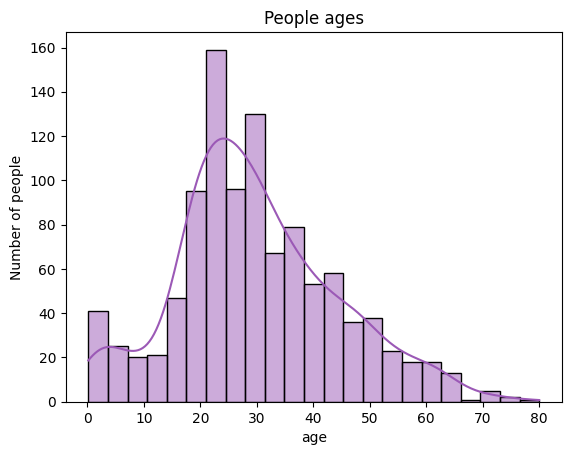

In [92]:
ax = sns.histplot(x="age",data=df, kde=True)
ax.set_title("People ages")
ax.set_ylabel("Number of people")

### 2. Which family had lost the most members?

##### seperate names for easier access


In [93]:
family_names = df["name"].apply(lambda name: name.split(",")[0].strip())
prefixes = df["name"].apply(lambda name: (name.split(",")[1]).split(".")[0].strip())
first_names = df["name"].apply(lambda name: (name.split(",")[1]).split(".")[1].strip())
df["first_name"] = first_names
df["last_name"] = family_names
df["prefix"] = prefixes


In [94]:
# # assuming families had the same tickets and family names

# df["died"] = df["survived"].apply(lambda survived: 1-survived)
# max_deaths = families_deaths.died.max()
# families_most_deaths = families_deaths[families_deaths["died"] == max_deaths].reset_index()
# # families_deaths.plot()
# print("Families with most deaths:\n", families_most_deaths[["last_name", "died"]])
# axes = sns.violinplot(y="died",data=families_deaths)
# axes.set_title("How many familiy members died in each family")


### How does the family size on board affects the survival of an individual?


In [95]:
df = df.assign(num_family_members = lambda x: x["sibsp"] + x["parch"])

Text(0.5, 0, 'Survived')

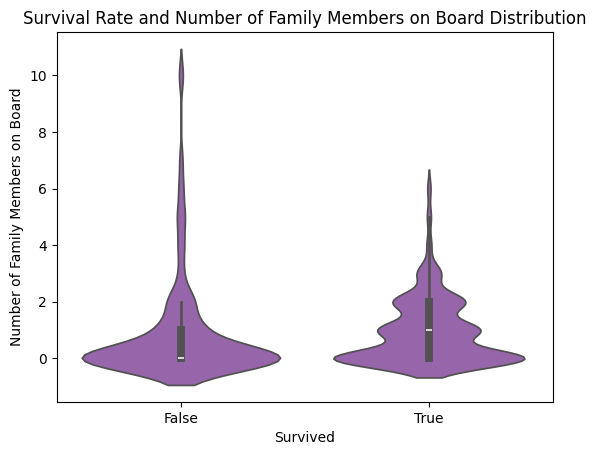

In [96]:
axes = sns.violinplot(x=df["survived"].apply(bool),y="num_family_members",data=df)
axes.set_title("Survival Rate and Number of Family Members on Board Distribution")
axes.set_ylabel("Number of Family Members on Board")
axes.set_xlabel("Survived")

This does not show the full picture because the distributions are not clearly different and their difference is not easy to interpret

Text(0, 0.5, 'Survived')

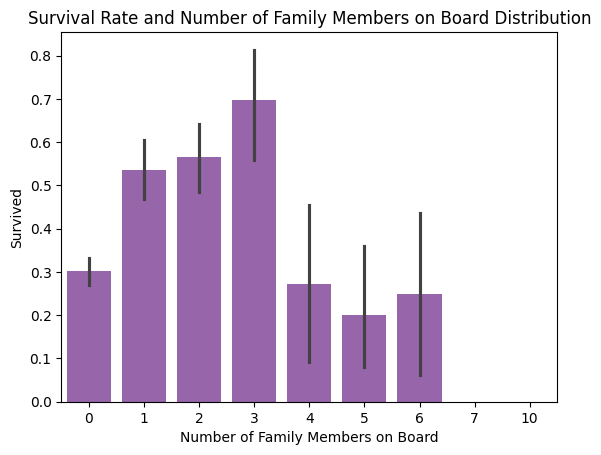

In [97]:
axes = sns.barplot(y=df["survived"].apply(bool),x="num_family_members",data=df)
axes.set_title("Survival Rate and Number of Family Members on Board Distribution")
axes.set_xlabel("Number of Family Members on Board")
axes.set_ylabel("Survived")

Here we can see a clearer picture of size of family and survival rate - the more family you have (from 4 and higher) the higher the chance you will die. I assume this is because this will probably mean you take care of other people first and this affects the chances of survival

##### Check number of children/parents on board to survival rate

In [98]:
# parents = df[(df["prefix"] == "Mr") | (df["prefix"] == "Mrs")]
# axes = sns.violinplot(x=df["survived"].apply(bool),y="parch", hue="sex",data=df)
# axes.set_title("Number of Children Distribution between Survivors and Non-survivors\n(Parents Only)")
# axes.set_ylabel("Number of Children on Board")
# axes.set_xlabel("Survived")

count_families = df[["ticket","last_name","age"]].groupby(["ticket","last_name"]).count()
count_families = count_families.rename(columns={"age":"num_fam_mem"})
count_families = count_families.reset_index()
count_families["family_id"] = count_families.index
df = df.merge(count_families[["ticket","last_name","family_id"]], on = ["ticket","last_name"])

In [99]:
mothers = df[["first_name","family_id", "age","sex"]][df["sex"]=="female"].groupby(["family_id"]).max()
fathers = df[["family_id", "age","sex"]][df["sex"]=="male"].groupby(["family_id"]).max()
mothers["mother"] = 1
mothers = mothers.reset_index()
df.merge(mothers[["family_id","first_name","mother"]], on=["family_id","first_name"])

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,first_name,last_name,prefix,num_family_members,family_id,mother
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Elisabeth Walton,Allen,Miss,0,22,1
1,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Hudson J C (Bessie Waldo Daniels),Allison,Mrs,3,45,1
2,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",Kornelia Theodosia,Andrews,Miss,1,12,1
3,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",Edward Dale (Charlotte Lamson),Appleton,Mrs,2,5,1
4,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C,4,NaN,"New York, NY",John Jacob (Madeleine Talmadge Force),Astor,Mrs,1,915,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,3,0,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,NaN,NaN,NaN,Hulda Amanda Adolfina,Vestrom,Miss,0,619,1
385,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,0,0,2688,7.2292,NaN,C,C,NaN,NaN,George Joseph (Shawneene Abi-Saab),Whabee,Mrs,0,335,1
386,3,1,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN,NaN,NaN,James (Ellen Needs),Wilkes,Mrs,1,636,1
387,3,1,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C,NaN,NaN,NaN,Antoni (Selini Alexander),Yasbeck,Mrs,1,305,1


### 3.Is there a connection between the age of a passenger and it's chance of survival? What about his pclass?

In [100]:
# Chceck connection between age and pclass to survival
# Check connection between age and sex to survival
rounded_age = df["age"].fillna(value=-10).apply(int) # rounding and making all NaN to be -10 (in order to ignore NaN)
survived = df["survived"].apply(bool)

Text(0.5, 1.0, 'Age Distribution Between Survivors and Dead')

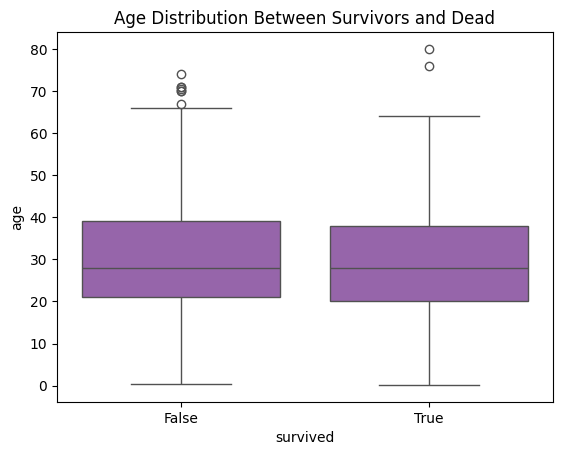

In [101]:
sns.boxplot(x=df["survived"].apply(bool), y="age", data=df).set_title("Age Distribution Between Survivors and Dead")

Age did not play a significant role overall - either not many old people or same distribution between
dead and alive old people, or both....

##### Check survival distribution across ages and pclass


Text(0.5, 0, 'Age')

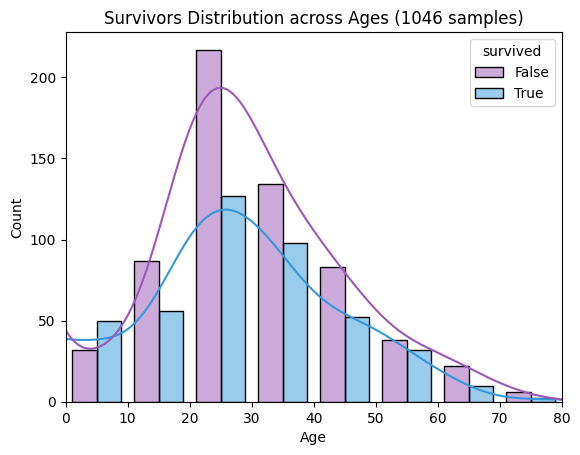

In [102]:

plot = sns.histplot(data=df, x=rounded_age ,hue=survived, kde=True, binwidth=10, multiple="dodge", shrink=.8)
plot.set_title(f"Survivors Distribution across Ages ({len(rounded_age[rounded_age>-1])} samples)")
plot.set_xlim(0, rounded_age.max())
plot.set_xlabel("Age")

More dead than alive in any age group except for the children

Text(0.5, 1.0, 'Survial Rate by Age Groups')

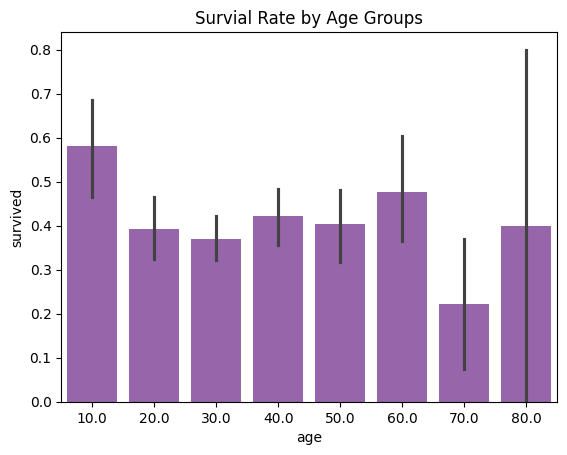

In [103]:

rounded_age_grouped = rounded_age.apply(round_to_nearest_ten)

plot = sns.barplot(x=rounded_age_grouped[rounded_age_grouped>=0],y="survived",data=df )
plot.set_title("Survial Rate by Age Groups")
# plot.set_xlim(0.5)

As expected - survival rate is lower than 0.5 for all age groups except children.

### Survival and classes

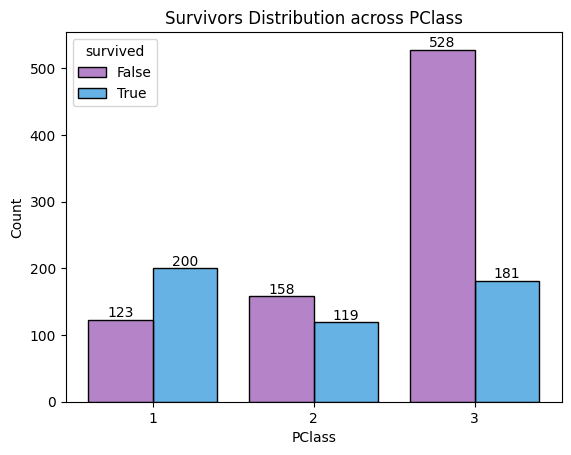

In [104]:
ax = sns.histplot(x=df.pclass.apply(str), hue=df.survived.apply(bool),data=df, multiple="dodge", shrink=.8)
ax.set_xlabel("PClass")
ax.set_title("Survivors Distribution across PClass")
for i in ax.containers:
    ax.bar_label(i)

Best chance to survive in first class, and third class is significantly worse than the other classes

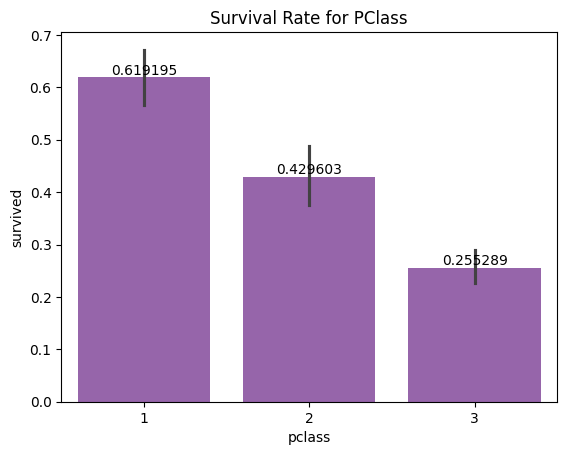

In [105]:
ax = sns.barplot(data=df,x="pclass",y=survived, )
ax.set_title("Survival Rate for PClass")
for i in ax.containers:
    ax.bar_label(i)

Visually comparing sruvivability between the classes

##### Relation between age, pclass and survival

Text(0.5, 1.0, 'Age distribution across pclass')

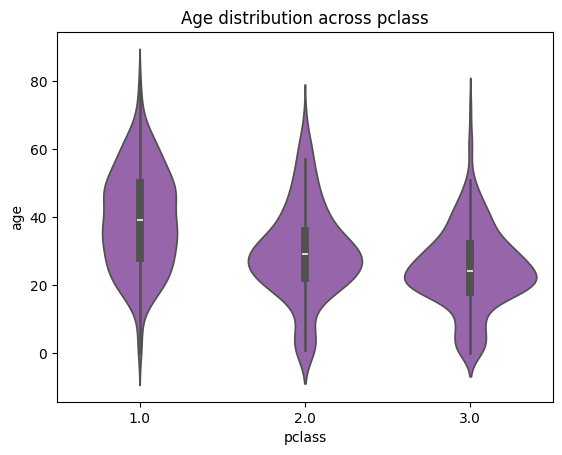

In [106]:
df_only_with_age = df[df["age"] >= 0]
sns.violinplot(data=df_only_with_age, y=rounded_age, x="pclass").set_title("Age distribution across pclass")


More young people as the classes go higher - probably because first class costs more

Text(0.5, 1.0, 'Age and Pclass Sruvival Distribution ')

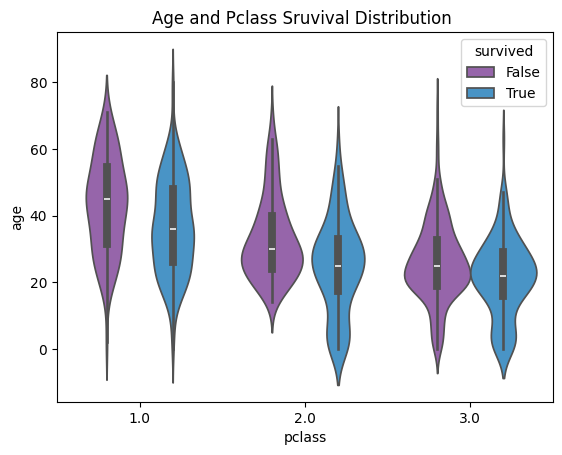

In [107]:
sns.violinplot(data=df_only_with_age, y=rounded_age, x="pclass",hue=survived).set_title("Age and Pclass Sruvival Distribution ")


In each class, the group that survived was generally a little bit younger. As observed before - the higher the class the older the general age

### Check Sex relation to survival

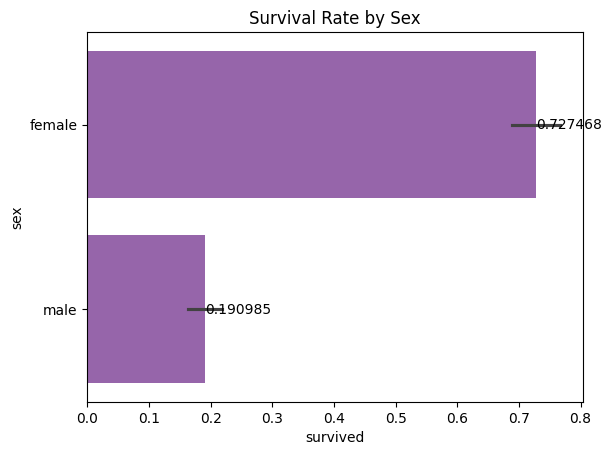

In [108]:
ax = sns.barplot(x=df["survived"].apply(bool),y=df["sex"].apply(str), data=df)
ax.set_title("Survival Rate by Sex")
for i in ax.containers:
    ax.bar_label(i)

There was a time where man were man, not woman

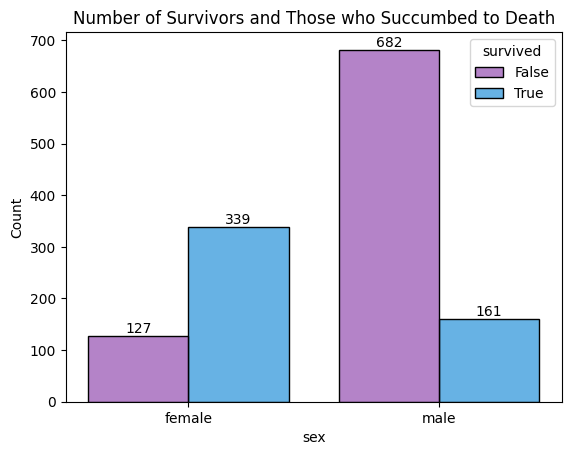

In [109]:
ax = sns.histplot(x="sex",hue=df["survived"].apply(bool), data=df, multiple="dodge", shrink=0.8)
ax.set_title("Number of Survivors and Those who Succumbed to Death")
for i in ax.containers:
    ax.bar_label(i)

Some numbers for clarity


#### Age impact on survival in each sex group

Text(0.5, 1.0, 'Age Distribution in Each Sex Group and Survival Group')

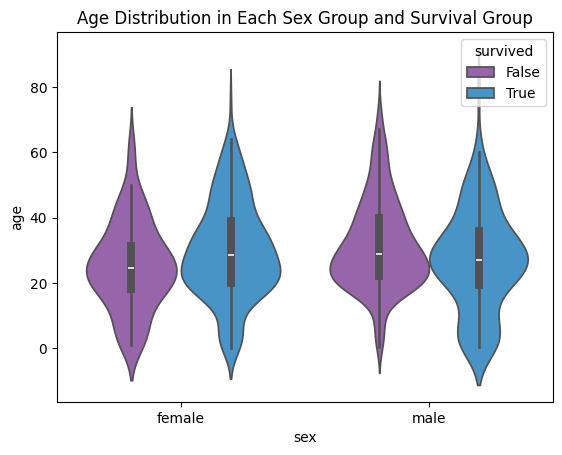

In [110]:
axes = sns.violinplot(x="sex", y="age", hue=df["survived"].apply(bool), data=df)
axes.set_title("Age Distribution in Each Sex Group and Survival Group")

In the women group - we can see that older women had a slight advantage in surviving.

In the men group - we can see that the group who survived consists of more young man than the group who died. The difference is clearer than in the woman group

Text(0, 0.5, 'Survivability Chance')

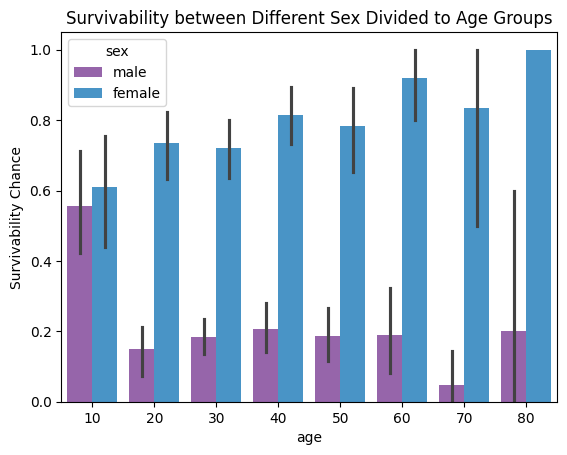

In [111]:
ages = df_only_with_age["age"].apply(round_to_nearest_ten)

axes = sns.barplot(x=ages, y="survived", hue="sex",data=df_only_with_age)
axes.set_title("Survivability between Different Sex Divided to Age Groups")
axes.set_ylabel("Survivability Chance")


Women survival chance on the boat in general is higher than 0.6 no matter the age. We can also observe that young children don't have such a difference in survival between the different sex groups

### More stuff to see

Text(0.5, 1.0, 'Survival Probability in Relation to Ticket Fare')

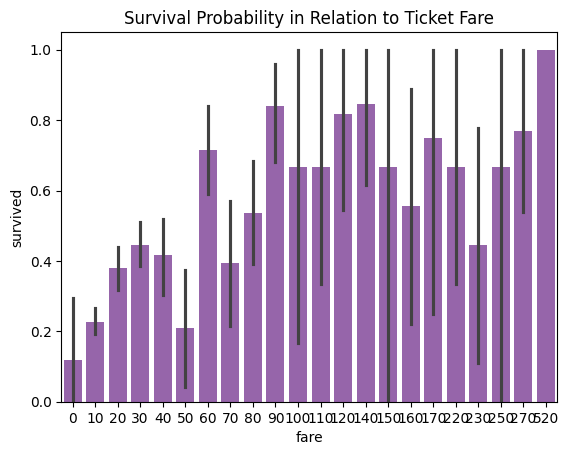

In [112]:
payed = df[df["fare"].notna()]
axes=sns.barplot(x=payed["fare"].apply(round_to_nearest(10)),y="survived",data=payed)
axes.set_title("Survival Probability in Relation to Ticket Fare")

Pay to win

Text(0.5, 1.0, 'Number of people for each ticket price')

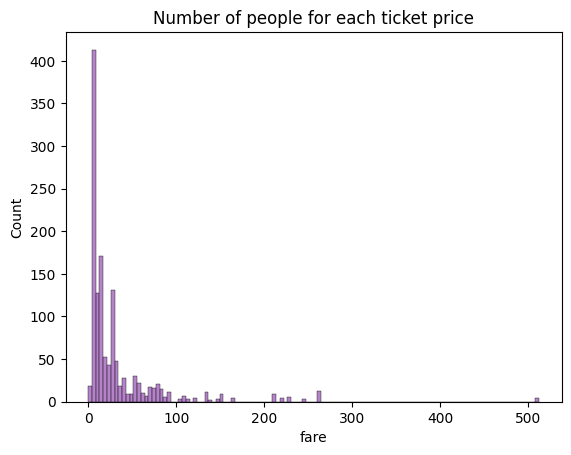

In [113]:
sns.histplot(x="fare",data=payed).set_title("Number of people for each ticket price")
# payed

Why is the DIP in 160-260 range in fare?

Text(0.5, 1.0, 'Pclass distribution for each ticket fare')

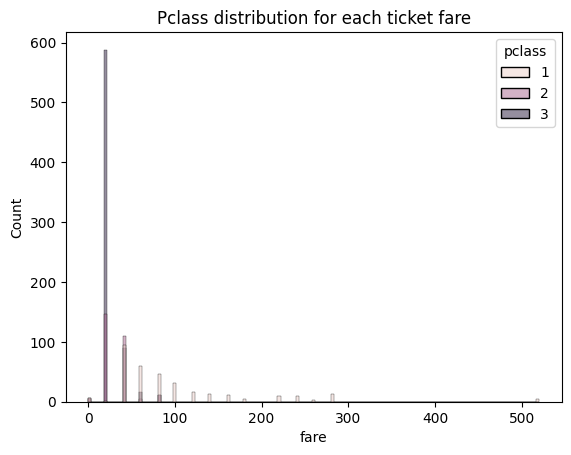

In [114]:
payed = df[df["fare"].notna()]
flatui = ["#9b59b6", "#3498db", "orange"]
sns.set_palette(flatui)
axes=sns.histplot(x=payed["fare"].apply(round_to_nearest(20)),hue="pclass",data=payed)
axes.set_title("Pclass distribution for each ticket fare")

<Axes: xlabel='survived', ylabel='Count'>

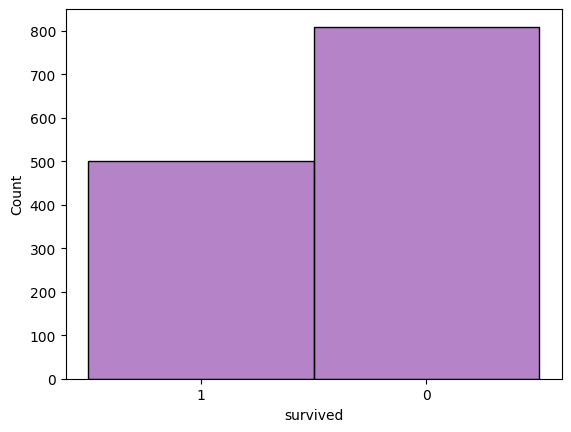

In [115]:
dip = df[(df["fare"] >= 160) & (df["fare"] <= 260)]
# g = sns.PairGrid(dip)
sns.histplot(x=df["survived"].apply(str),data=dip)


<Axes: xlabel='pclass', ylabel='Count'>

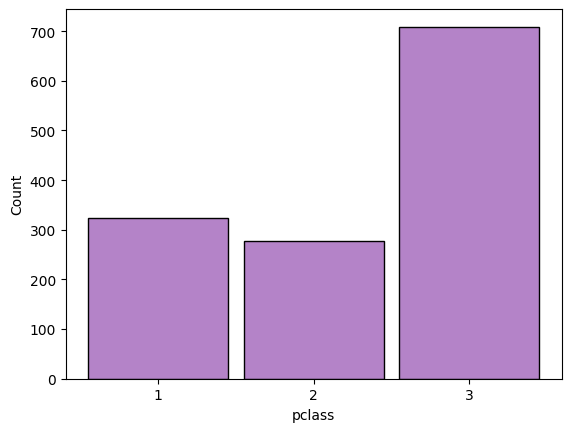

In [116]:
sns.histplot(x=df["pclass"].apply(str),data=df, shrink=.9)


Text(0.5, 1.0, 'Survival Probability in Relation to Ticket Fare (Divided by Sex)')

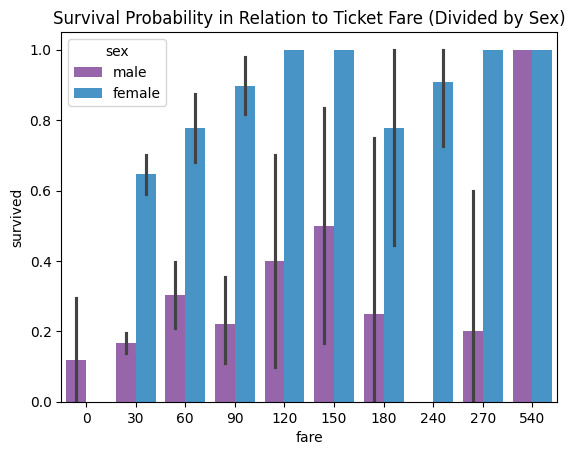

In [117]:
payed = df[df["fare"].notna()]
axes=sns.barplot(x=payed["fare"].apply(round_to_nearest(30)),y="survived", hue="sex",data=payed)
axes.set_title("Survival Probability in Relation to Ticket Fare (Divided by Sex)")

There is still a difference here between the two sexes but nothing new comes up when taking ticket fare into account

##### Relation 

Text(0.5, 0, 'Cabin')

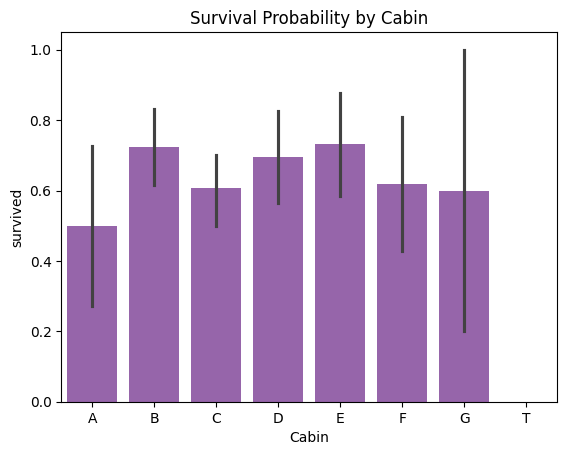

In [118]:
df["cabin_letter"] = (df[df["cabin"].notna()]["cabin"].apply(lambda x: x[0]))
df = df.sort_values(by=["cabin_letter"])
axes = sns.barplot(x="cabin_letter",y="survived", data=df)
axes.set_title("Survival Probability by Cabin")
axes.set_xlabel("Cabin")

I am not sure why some cabins have a higher survival chance - what do the cabins differ at?

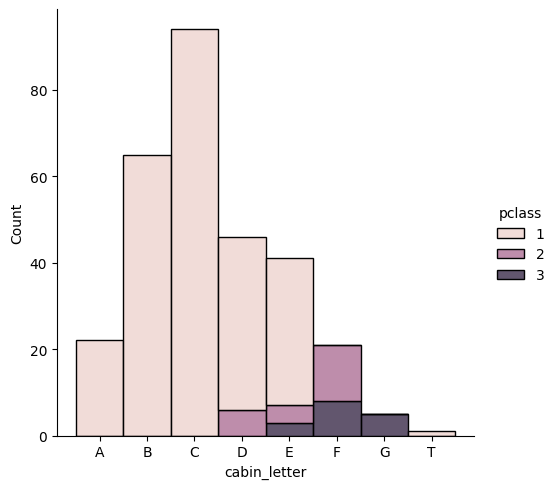

In [173]:
axes = sns.displot(x="cabin_letter",multiple="stack",hue="pclass", data=df)
# df


pclass                295
survived              295
name                  295
sex                   295
age                   272
sibsp                 295
parch                 295
ticket                295
fare                  295
cabin                 295
embarked              293
boat                  193
body                   32
home.dest             258
first_name            295
last_name             295
prefix                295
num_family_members    295
family_id             295
cabin_letter          295
dtype: int64


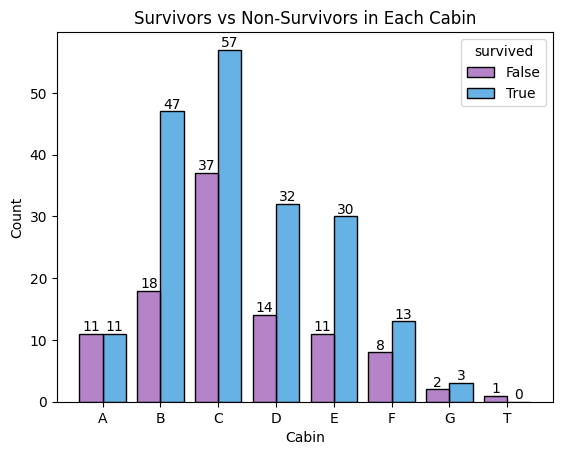

In [172]:
axes = sns.histplot(x="cabin_letter",hue=df["survived"].apply(bool),multiple="dodge", data=df,shrink=.8)
axes.set_title("Survivors vs Non-Survivors in Each Cabin")
axes.set_xlabel("Cabin")
for i in axes.containers:
    axes.bar_label(i)

print(df[df["cabin"].notna()].count())

Same as before

### Does where you embarked from affect the survival rate?


Text(0.5, 1.0, 'Embarkment and survivals')

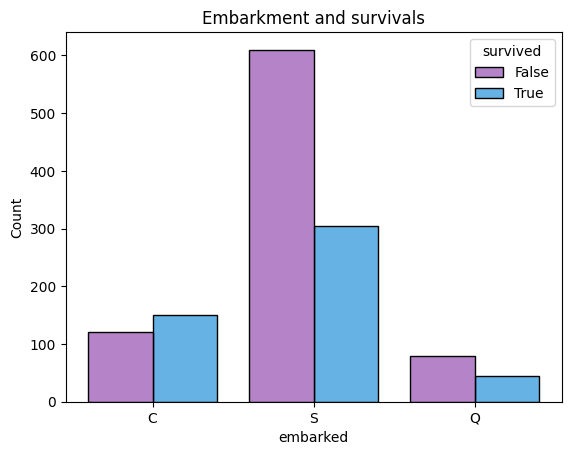

In [121]:
sns.histplot(x="embarked", hue=df["survived"].apply(bool), multiple="dodge", data=df, shrink=0.8).set_title("Embarkment and survivals")

Well, Don't embark from S my friends

Text(0.5, 1.0, 'Embarkment and survival rate')

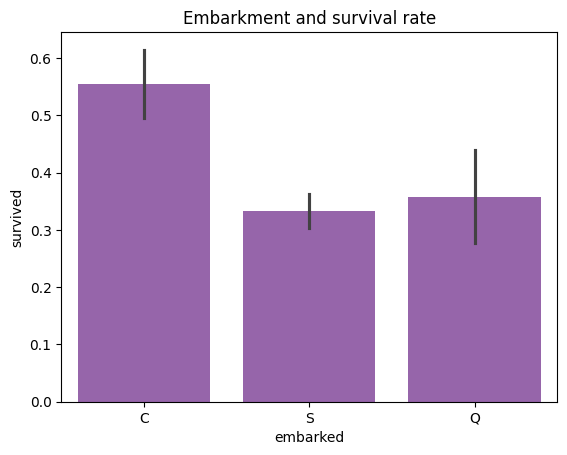

In [122]:
sns.barplot(x="embarked", y=df["survived"], data=df).set_title("Embarkment and survival rate")


Text(0.5, 1.0, 'Embarkment and class')

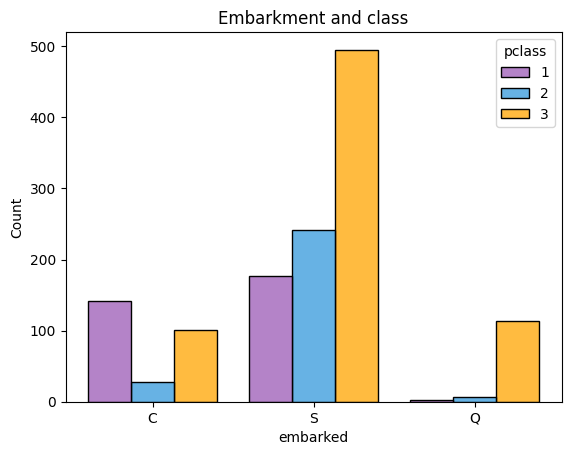

In [123]:
sns.histplot(x="embarked", hue=df["pclass"].apply(str), multiple="dodge", data=df, shrink=0.8).set_title("Embarkment and class")
# sns.histplot(x="embarked", y="pclass", multiple="dodge", data=df, shrink=0.8)


So the reason for the high death toll for people who embarked from S (or even Q) is the proportionallity between the different classes, as we know more people died in class 3 than any other class.

Text(0, 0.5, 'Survived')

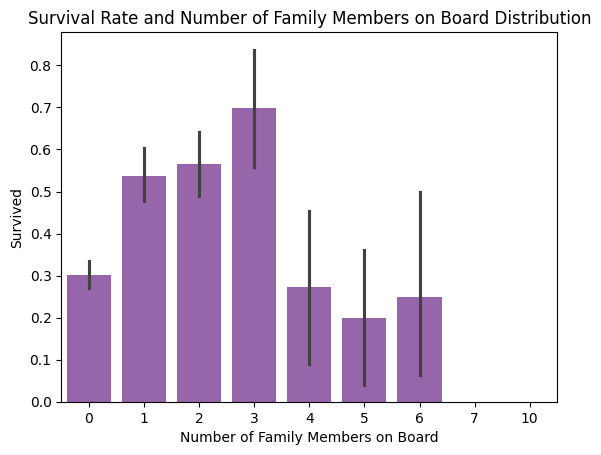

In [126]:
axes = sns.barplot(y=df["survived"].apply(bool),x="num_family_members",data=df)
axes.set_title("Survival Rate and Number of Family Members on Board Distribution")
axes.set_xlabel("Number of Family Members on Board")
axes.set_ylabel("Survived")

age       152
parent    152
dtype: int64


Text(0, 0.5, 'Survival ratio')

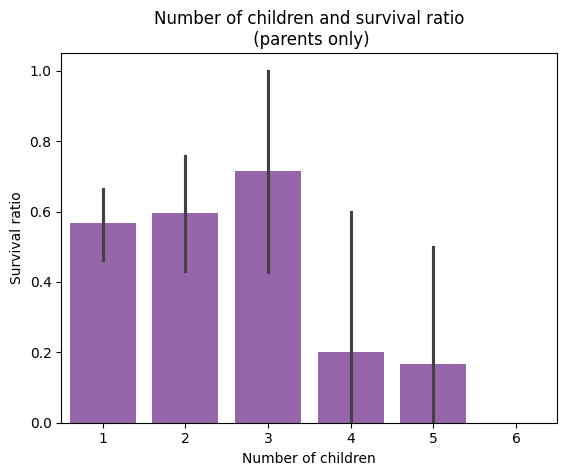

In [125]:
fdf = df[["ticket","last_name", "age","sex"]][(df["parch"] > 0) & (df["age"] > 15)]
nfdf = fdf.groupby(["ticket","last_name","sex"]).max()
nfdf["parent"] = 1
print(nfdf.count())
nfdf.reset_index()
df_with_parents = pd.merge_ordered(df,nfdf,on=["ticket","last_name","sex","age"], fill_method=lambda x:0)
df_with_parents.parent = df_with_parents["parent"].fillna(0)
parents = df_with_parents[df_with_parents["parent"]==1]
ax=sns.barplot(x="parch",y="survived", data=parents)
ax.set_title("Number of children and survival ratio\n (parents only)")
ax.set_xlabel("Number of children")
ax.set_ylabel("Survival ratio")
# df_with_parents.head(20)


Pretty similar to the number of family members on board to survival ration graph


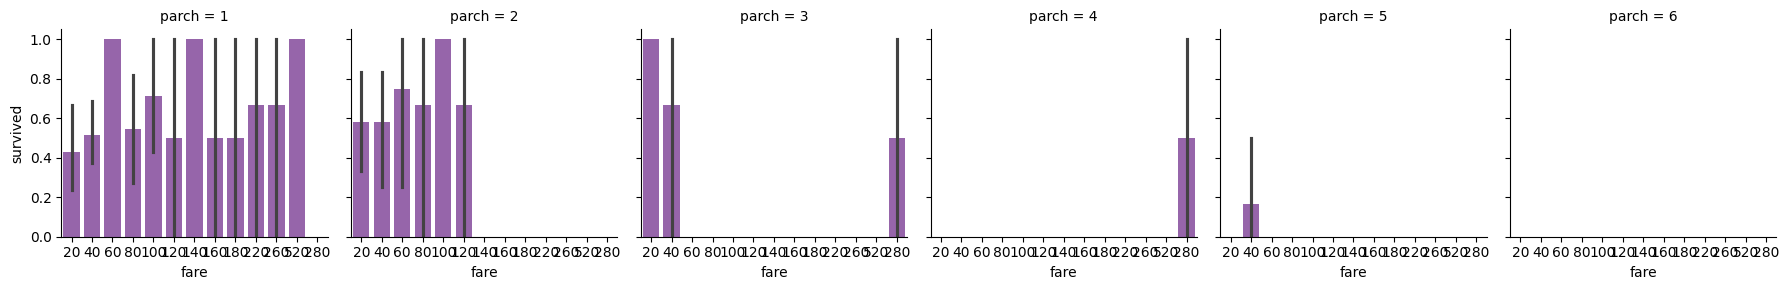

In [150]:

parents_payed = parents[parents["fare"].notna()]
parents_payed.fare = parents_payed.fare.apply(round_to_nearest(20))
# ax = sns.barplot(x="fare",y="parch", hue='survived', data=parents_payed)
# sns.barplot(x=df[df["fare"].notna()]["fare"].apply(round_to_nearest(20)), y="survived", data=df)
g = sns.FacetGrid(parents_payed, col="parch")
g.map_dataframe(sns.barplot, x="fare", y="survived")
# ax.set_title("num")

In [151]:
parents_payed[parents_payed["parch"] > 5]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,...,boat,body,home.dest,first_name,last_name,prefix,num_family_members,family_id,cabin_letter,parent
1056,3,0,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,60,NaN,...,NaN,NaN,"Wiltshire, England Niagara Falls, NY",Frederick (Augusta Tyler),Goodwin,Mrs,7,839,NaN,1.0
1061,3,0,"Goodwin, Mr. Charles Frederick",male,40.0,1,6,CA 2144,60,NaN,...,NaN,NaN,"Wiltshire, England Niagara Falls, NY",Charles Frederick,Goodwin,Mr,7,839,NaN,1.0


Larger families probably are poorer


Text(0.5, 1.0, 'Family size in each class')

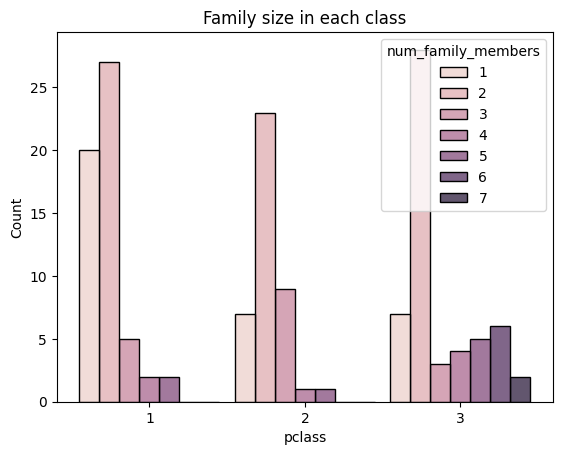

In [169]:
ax = sns.histplot(x=parents["pclass"].apply(str), hue="num_family_members", data=parents, shrink=.9, multiple="dodge")
ax.set_title("Family size in each class")

As we can see - larger family are usually on lower quality classes

Text(0.5, 1.0, 'Number of children for parents in each pclass')

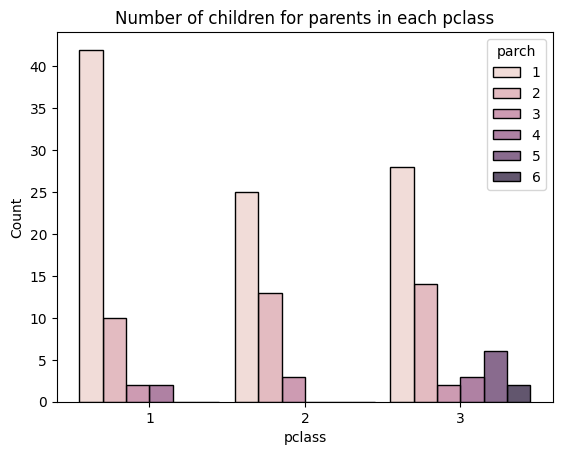

In [163]:
ax = sns.histplot(x=parents["pclass"].apply(str), hue="parch", data=parents, shrink=.9, multiple="dodge")
ax.set_title("Number of children for parents in each pclass")




Larger families in lower quality class

In [ ]:
# sns.barplot(data=df, x="num_family_members", y=df["pclass"].apply(str),hue=survived)
# df